In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lib_FRIDA_data import *

In [2]:
expID='EMB_26May_nS10000'
path='/home/lennart/Arbeit/2_WorldTrans/work/FRIDA_plots/'

SLR_total, time_FRIDA = readFromFridaOutput('SLR', expID=expID, path=path, lmedian=True)
SLR_thermo, time_FRIDA = readFromFridaOutput('SLR_thermo', expID=expID, path=path, lmedian=True)
SLR_MG, time_FRIDA = readFromFridaOutput('SLR_MG', expID=expID, path=path, lmedian=True)
SLR_GIS, time_FRIDA = readFromFridaOutput('SLR_GIS', expID=expID, path=path, lmedian=True)
SLR_AIS, time_FRIDA = readFromFridaOutput('SLR_AIS', expID=expID, path=path, lmedian=True)
hydrowater, time_FRIDA = readFromFridaOutput('Hydrowater', expID=expID, path=path, lmedian=True)
Groundwater, time_FRIDA = readFromFridaOutput('Groundwater', expID=expID, path=path, lmedian=True)


Loading variable: SLR
Loading variable: SLR_thermo
Loading variable: SLR_MG
Loading variable: SLR_GIS
Loading variable: SLR_AIS
Loading variable: Hydrowater
Loading variable: Groundwater


In [14]:
SLR_to_MioKm3 = 1.0/(2.77)

Ocean_anomaly = ((SLR_total - SLR_thermo) - (SLR_total[0] - SLR_thermo[0])) * SLR_to_MioKm3
MG_anomaly = -SLR_to_MioKm3*(SLR_MG - SLR_MG[0])
GIS_anomaly = -SLR_to_MioKm3*(SLR_GIS - SLR_GIS[0])
AIS_anomaly = -SLR_to_MioKm3*(SLR_AIS - SLR_AIS[0])
hydrowater_anomaly = (hydrowater - hydrowater[0])*1e-15
groundwater_anomaly = (Groundwater - Groundwater[0])*1e-15

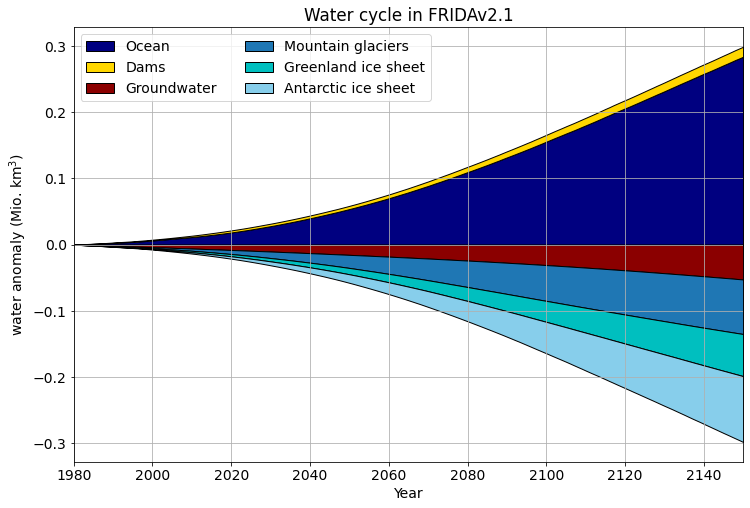

In [17]:
font=14
plt.figure(figsize=(12,8), facecolor='white')
plt.rcParams.update({'font.size': font})
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)

# GCB data
ax=plt.gca()



ax.stackplot(time_FRIDA,  Ocean_anomaly, hydrowater_anomaly, labels=['Ocean', 'Dams'], colors=['navy', 'gold'], alpha=1.0, edgecolor='k')
ax.stackplot(time_FRIDA, groundwater_anomaly, MG_anomaly, GIS_anomaly, AIS_anomaly,
             labels=['Groundwater', 'Mountain glaciers', 'Greenland ice sheet', 'Antarctic ice sheet'],
             colors=['darkred', 'tab:blue', 'c', 'skyblue'], edgecolor='k', alpha=1.0)


# Adding labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('water anomaly (Mio. km$^3$)')
ax.set_title(r'Water cycle in FRIDAv2.1')
ax.set_xlim(1980,2150)
#ax.set_ylim(-25,30)

ax.grid()
ax.legend(ncol=2, loc='upper left')

# Show plot
plt.subplots_adjust(wspace=0.1)
plt.savefig('FRIDA_EMBv2.1_water_cycle.png')